In [2]:
import pandas as pd
import statsmodels.api as sm

file = '../data/mortgage.csv'
loan_df = pd.read_csv(file)
pd.set_option('display.max_columns', None)
print(loan_df.head())



        id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1062177  2011  01/12/2011  1062013             2.0       MORTGAGE   
1  1049352  2011  01/12/2011  1042013             1.0       MORTGAGE   
2  1062976  2011  01/12/2011  1042013            10.0           RENT   
3  1058564  2011  01/12/2011  1122014             6.0           RENT   
4  1061837  2011  01/12/2011  1122014             7.0           RENT   

  income_category  annual_inc  income_cat  loan_amount        term  term_cat  \
0             Low       44400           1        15000   36 months         1   
1             Low      100000           1         6600   36 months         1   
2             Low       45000           1         4000   60 months         2   
3             Low       57600           1         8000   36 months         1   
4             Low       60000           1        15000   36 months         1   

  application_type purpose  purpose_cat interest_payments loan_condition  \
0       IN

In [3]:
# variables
features = ['annual_inc', 'emp_length_int', 'interest_rate', 'dti', 'grade_cat']
target = 'loan_amount'

X = loan_df[features]
y = loan_df[target]

X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     218.2
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          1.64e-204
Time:                        10:33:25   Log-Likelihood:                -38486.
No. Observations:                3707   AIC:                         7.698e+04
Df Residuals:                    3701   BIC:                         7.702e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4422.4237    643.432      6.

#results
1) The model explains about 23% of the variation in loan amounts (R-squared = 0.228). This means it's not very accurate, as many other factors also affect loan amounts.
2) The F-statistic is 218.2, and the associated p-value (Prob > F) is extremely low (1.64e-204), indicating that the overall model is statistically significant and that at least one of the predictors is significantly related to the loan amount.
3) Annual Income (annual_inc): The coefficient is 0.0697, with a very low p-value (<0.0001), indicating that annual income is a significant positive predictor of loan amount.
4) Employment Length (emp_length_int): The coefficient is 142.4458, with a p-value of 0.000. This indicates that for each additional year of employment, the loan amount increases by approximately 142.45 dollars.
5) Interest Rate (interest_rate): The coefficient is 378.9188, with a p-value of 0.000. This suggests that a higher interest rate is associated with a higher loan amount. For each percentage point increase in the interest rate, the loan amount increases by about 378.92 dollars.
6) Debt-to-Income Ratio (dti): The coefficient is -46.5928, with a p-value of 0.003, indicating that higher DTI ratios are associated with lower loan amounts. 
7) Grade Category (grade_cat): The coefficient is -385.4102, with a p-value of 0.200. This suggests that grade category is not a statistically significant predictor of loan amount in this model.

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# variables
features = ['annual_inc', 'emp_length_int', 'interest_rate', 'dti', 'grade_cat']
target = 'loan_condition'

X = loan_df[features]
y = loan_df[target]

# 
y = y.map({'Good Loan': 1, 'Bad Loan': 0})

# testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train).fit()


print(logit_model.summary())

# predictions
y_pred_prob = logit_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.335409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         loan_condition   No. Observations:                 2965
Model:                          Logit   Df Residuals:                     2959
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                 0.03955
Time:                        10:33:25   Log-Likelihood:                -994.49
converged:                       True   LL-Null:                       -1035.4
Covariance Type:            nonrobust   LLR p-value:                 3.344e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2024      0.066     33.601      0.000       2.074       2.331
x1             0.4160      0.

c:\Users\shiya\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiya\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiya\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### Shiyams Changes follows

In [5]:
print(loan_df)

            id  year     issue_d  final_d  emp_length_int home_ownership  \
0      1062177  2011  01/12/2011  1062013            2.00       MORTGAGE   
1      1049352  2011  01/12/2011  1042013            1.00       MORTGAGE   
2      1062976  2011  01/12/2011  1042013           10.00           RENT   
3      1058564  2011  01/12/2011  1122014            6.00           RENT   
4      1061837  2011  01/12/2011  1122014            7.00           RENT   
...        ...   ...         ...      ...             ...            ...   
3702  37650889  2015  01/01/2015  1122015            0.50           RENT   
3703  37841158  2015  01/01/2015  1012016            8.00           RENT   
3704  37630940  2015  01/01/2015  1012016            3.00           RENT   
3705  37601033  2015  01/01/2015  1012016            6.05           RENT   
3706  37670482  2015  01/01/2015  1052015            1.00           RENT   

     income_category  annual_inc  income_cat  loan_amount        term  \
0             

In [22]:
type(loan_df['loan_condition'])

loan_features = loan_df.drop(columns=['loan_condition','id', 'issue_d', 'final_d'])


loan_features

,year,emp_length_int,home_ownership,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,purpose,purpose_cat,interest_payments,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,2.00,MORTGAGE,Low,44400,1,15000,36 months,1,INDIVIDUAL,house,12,High,17.27,D,4,3.59,17991.530000,15000.00,0.00,536.81,leinster
1,2011,1.00,MORTGAGE,Low,100000,1,6600,36 months,1,INDIVIDUAL,house,12,Low,9.91,B,2,15.53,7274.620000,6600.00,0.00,212.69,leinster
2,2011,10.00,RENT,Low,45000,1,4000,60 months,2,INDIVIDUAL,house,12,High,19.91,E,5,15.20,1775.800000,660.29,191.14,105.78,Northern-Irl
3,2011,6.00,RENT,Low,57600,1,8000,36 months,1,INDIVIDUAL,house,12,Low,6.03,A,1,11.52,8765.098071,8000.00,0.00,243.49,ulster
4,2011,7.00,RENT,Low,60000,1,15000,36 months,1,INDIVIDUAL,house,12,Low,6.03,A,1,12.78,16434.538010,15000.00,0.00,456.54,Northern-Irl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,2015,0.50,RENT,Low,62400,1,5000,36 months,1,INDIVIDUAL,house,12,Low,9.49,B,2,12.63,5387.420000,5000.00,0.00,160.15,Northern-Irl
3703,2015,8.00,RENT,Medium,140000,2,35000,60 months,2,INDIVIDUAL,house,12,High,21.99,E,5,28.76,11512.120000,4319.36,0.00,966.47,ulster
3704,2015,3.00,RENT,High,280000,3,35000,36 months,1,INDIVIDUAL,house,12,Low,10.49,B,2,14.81,13608.370000,10471.63,0.00,1137.43,ulster
3705,2015,6.05,RENT,Low,45000,1,1500,36 months,1,INDIVIDUAL,house,12,High,17.86,D,4,27.63,648.070000,414.51,0.00,54.13,cannught


In [24]:
loan_target = loan_df['loan_condition'].map({'Good Loan': 1, 'Bad Loan':0})
loan_target

0       1
1       1
2       0
3       1
4       1
       ..
3702    1
3703    1
3704    1
3705    1
3706    0
Name: loan_condition, Length: 3707, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(loan_features, loan_target, test_size=0.2, random_state=42)


# Define numerical and categorical columns
numerical_cols = loan_features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = loan_features.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [27]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['year', 'emp_length_int', 'annual_inc', 'income_cat', 'loan_amount',
       'term_cat', 'purpose_cat', 'interest_rate', 'grade_cat', 'dti',
       'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['home_ownership', 'income_category', 'term', 'application_type',
       'purpose', 'interest_payments', 'grade', 'region'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [28]:
# Make predictions
y_pred = clf.predict(X_test)




In [29]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        87
           1       0.94      1.00      0.97       655

    accuracy                           0.94       742
   macro avg       0.97      0.76      0.83       742
weighted avg       0.95      0.94      0.94       742



In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[ 45,  42],
       [  0, 655]], dtype=int64)

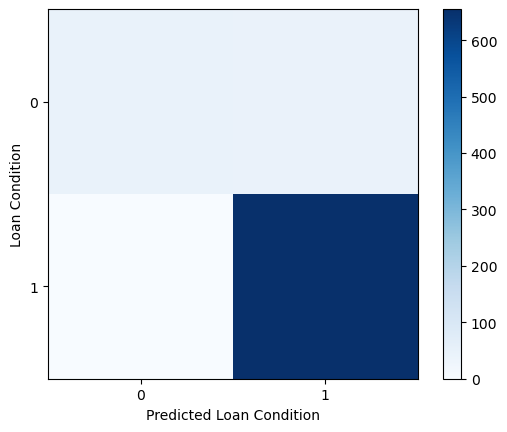

In [34]:
import matplotlib.pyplot as plt

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.xlabel("Predicted Loan Condition")
plt.ylabel("Loan Condition")
plt.show()